In [2]:
import pandas as pd

data = pd.read_csv('Political Interest.csv')

In [3]:
data

,gender,education_level,political_interest
0,1,1,38.0
1,1,1,39.0
2,1,1,35.0
3,1,1,38.0
4,1,1,41.0
5,1,1,40.0
6,1,1,36.0
7,1,1,37.0
8,1,1,33.0
9,1,2,41.5


&emsp; Given the **null hypothesis ($H_0$):** There is no significant interaction effect on political interest between gender and education level.

&emsp; We are interested in examining the interaction between gender and education level to see if they jointly affect political interest. In this scenario, the most appropriate statistical test would be a **two-way Analysis of Variance (ANOVA)**. 

&emsp; Two-way ANOVA allows us to test the interaction effect between two independent categorical variables (gender and education level) on a continuous dependent variable (political interest).

But note that, in order to run a two-way ANOVA, there are **six (6) assumptions** that need to be considered first. These assumptions are:
>1. There is **one (1) dependent variable** that is measured at the continuous level (i.e., the interval or ratio level).
2. There are **two (2) independent variables** where each independent variable consists of two or more categorical, independent groups. 
3. There should have **independence of observations,** which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.
4. There should be **no significant outliers** in any cell of the design.
5. The distribution of the dependent variable should be approximately **normally distributed** in every cell of the design.
6. The **variance** of the dependent variable should be **equal** in every cell of the design.

<h4>Testing of Assumptions</h4>

<h4>Assumption 1:</h4> 

&emsp;The dependent variable, **interest in politics**, is measured at the continuous level.

>**Remark:** This assumption is met since the participant's interest in politics is measured on a continuous scale, as the participants rated their interest on a scale, from 0 to 100, which is a continuous data.

<h4>Assumption 2:</h4>

&emsp;The two independent variables, **gender and educational level**, each consists of two or more categorical, independent groups.    

>**Remark:** In this case, the assumption is met since the independent variable gender has two (2) categorical independent group (Male/Female) and the independent variable, education level, has three (3), which consists of School, College & University. 

<h4>Assumption 3:</h4> 

&emsp;The independence of observation is observed.  

>**Remark:** The assumption of independence of observations is met because participants were randomly sampled, ensuring that each person's response was collected separately and without any influence from others. Since there is no dependencies between responses, as each participant's rating reflects their individual perspective on politics, this assumption is met.

<h4>Assumption 4:</h4> 

&emsp; There should be no significant outliers.  

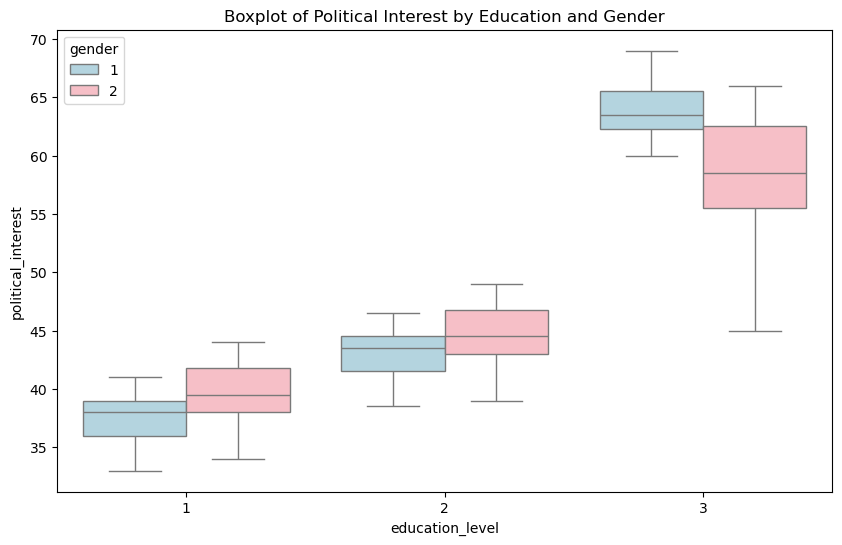

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

color = {1: 'lightblue', 2: 'lightpink'}

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='education_level', y='political_interest', hue='gender', palette=color)
plt.title("Boxplot of Political Interest by Education and Gender")
plt.show()

> **Remark:** As you can see in the boxplot, there are no hollowed circles outside of the box, hence, there are no significant outliers and therefore,  the assumption is met. 

<h4>Assumption 5:</h4> 

&emsp; The dependent variable, interest in politics, is approximately normally distributed for each combination of the groups of gender and educational level, as assessed by Shapiro-Wilk test of normality, (p > 0.05).  

In [23]:
import scipy.stats as stats

for (gender, edu), group in data.groupby(['gender', 'education_level']):
    stat, p_value = stats.shapiro(group['political_interest'])
    print(f"Shapiro-Wilk test for normality (Gender: {gender}, Education: {edu}): p-value = {p_value:.4f}")

Shapiro-Wilk test for normality (Gender: 1, Education: 1): p-value = 0.9708
Shapiro-Wilk test for normality (Gender: 1, Education: 2): p-value = 0.7611
Shapiro-Wilk test for normality (Gender: 1, Education: 3): p-value = 0.3197
Shapiro-Wilk test for normality (Gender: 2, Education: 1): p-value = 0.8189
Shapiro-Wilk test for normality (Gender: 2, Education: 2): p-value = 0.8189
Shapiro-Wilk test for normality (Gender: 2, Education: 3): p-value = 0.6684


> **Remark:** The results of the Shapiro-Wilk test for normality indicate that for all combinations of gender and education level, the p-values are greater than the significance level of 0.05, which suggests that the data in each group follows a normal distribution. Hence, the assumption is met.

<h4>Assumption 6:</h4> 

&emsp; The variances for each combination of the groups of gender and educational level are equal, as assessed by Levene’s test of equality of variances, p = 0.068.  

In [25]:
levene_stat, levene_p = stats.levene(
    *[group['political_interest'].values for name, group in data.groupby(['gender', 'education_level'])]
)
print(f"Levene's test for equality of variances: p-value = {levene_p:.3f}")

Levene's test for equality of variances: p-value = 0.068


>**Remark:** Since the result of the Levene's Test for equal variances are greater than 0.05, then the assumption of equal variance is met.

Since all of these six (6) assumptions have been met, we will then proceed to the two-way ANOVA test.

<h4> Two-way ANOVA Test </h4>

In [63]:
from statsmodels.formula.api import ols

model = ols('political_interest ~ C(gender) * C(education_level)', data=data).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(gender),10.704737,1.0,0.744533,3.921748e-01
C(education_level),5409.958966,2.0,188.136131,1.553704e-24
C(gender):C(education_level),210.337661,2.0,7.314679,1.587744e-03
Residual,747.644444,52.0,NaN,NaN


> **Remarks:** The interaction between gender and education level (C(gender):C(education_level)) has an F-value of 7.31 with a p-value of **0.00159**. Since the p-value is less than 0.05, **the interaction is statistically significant**.      
&emsp; The main effect of gender is not statistically significant **(p = 0.392)**, meaning that gender alone does not appear to have a direct influence on political interest. And although the main effect of education level is significant **(p < 0.001)**, it is to be interpreted with the understanding that this effect can be modified by gender. Therefore, the main effects of each independent variable should not be reported.      
&emsp; Since there is a significant interaction, it’s more useful to interpret the effect of education level within the context of gender by **simple main effects analysis.**

<h4>Simple Main Effects Analysis</h4>

**Gender - Simple Main Effect**

In [66]:
for edu_level in data['education_level'].unique():
    sub_data = data[data['education_level'] == edu_level]
    model = ols('political_interest ~ C(gender)', data=sub_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nEffect of Gender within Education Level {edu_level}")
    print(anova_table)


Effect of Gender within Education Level 1
               sum_sq    df         F    PR(>F)
C(gender)   22.009357   1.0  2.551858  0.128585
Residual   146.622222  17.0       NaN       NaN

Effect of Gender within Education Level 2
               sum_sq    df         F    PR(>F)
C(gender)   12.983041   1.0  1.575137  0.226442
Residual   140.122222  17.0       NaN       NaN

Effect of Gender within Education Level 3
           sum_sq    df         F    PR(>F)
C(gender)  186.05   1.0  7.266001  0.014791
Residual   460.90  18.0       NaN       NaN


> **Remarks:**  A simple main effects analysis was conducted to examine the effect of gender at different levels of education. **At the university level, there was a statistically significant effect of gender.**  
&emsp; In **Education Levels 1 and 2 (School & College)**, gender does not significantly affect interest in politics, with a p-value greater than the significance level of 0.05 (0.129 & 0.226 respectively).       
&emsp; In **Education Level 3 (University)**, gender does have a significant effect, with a p-value of 0.015, indicating that the level of interest in politics may differ between males and females in university-level education.

**Education Level - Simple Main Effect**

In [49]:
for gender_level in data['gender'].unique():
    sub_data = data[data['gender'] == gender_level]
    model = ols('political_interest ~ C(education_level)', data=sub_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nEffect of Education Level within Gender {gender_level}")
    print(anova_table)


Effect of Education Level within Gender 1
                         sum_sq    df           F        PR(>F)
C(education_level)  3809.896627   2.0  266.285643  1.397961e-17
Residual             178.844444  25.0         NaN           NaN

Effect of Education Level within Gender 2
                    sum_sq    df          F        PR(>F)
C(education_level)  1810.4   2.0  42.968354  4.075084e-09
Residual             568.8  27.0        NaN           NaN


> **Remarks:** A simple main effects analysis was conducted to examine the effect of education level within each gender. **The effect of education level was statistically significant for both males and females.**       
&emsp; In **Gender 1 (Males)**. The p-value of **1.397961e-17** is extremely small, far below the significance level (0.05). This indicates that the effect of education level on males is highly statistically significant.
&emsp; In **Gender 2 (Females)**. The p-value of **4.075084e-09** is also very small, indicating that the effect of education level on females is statistically significant as well.

<h4>Post Hoc Comparisons – Gender*Educational Level</h4>

In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

interaction_term = data['gender'].astype(str) + "_" + data['education_level'].astype(str)

tukey = pairwise_tukeyhsd(data['political_interest'], interaction_term)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1_1    1_2      5.5 0.0371  0.2116 10.7884   True
   1_1    1_3  26.6556    0.0  21.501 31.8101   True
   1_1    2_1   2.1556 0.8165  -2.999  7.3101  False
   1_1    2_2   7.1556 0.0019   2.001 12.3101   True
   1_1    2_3  20.5556    0.0  15.401 25.7101   True
   1_2    1_3  21.1556    0.0  16.001 26.3101   True
   1_2    2_1  -3.3444 0.4021  -8.499  1.8101  False
   1_2    2_2   1.6556 0.9312  -3.499  6.8101  False
   1_2    2_3  15.0556    0.0   9.901 20.2101   True
   1_3    2_1    -24.5    0.0 -29.517 -19.483   True
   1_3    2_2    -19.5    0.0 -24.517 -14.483   True
   1_3    2_3     -6.1 0.0089 -11.117  -1.083   True
   2_1    2_2      5.0 0.0513  -0.017  10.017  False
   2_1    2_3     18.4    0.0  13.383  23.417   True
   2_2    2_3     13.4    0.0   8.383  18.417   True
----------------------------------------------

In [61]:
desc = data.groupby(['gender', 'education_level']).agg(
    Mean_Interest=('political_interest', 'mean'),
    Std_Dev=('political_interest', 'std'),
    Count=('political_interest', 'size')
).reset_index()
desc

,gender,education_level,Mean_Interest,Std_Dev,Count
0,1,1,37.444444,2.505549,9
1,1,2,42.944444,2.337793,9
2,1,3,64.100000,3.071373,10
3,2,1,39.600000,3.272783,10
4,2,2,44.600000,3.272783,10
5,2,3,58.000000,6.463573,10


>**Remarks:** All pairwise comparisons were run for each simple main effect.        
  
&emsp; For **males (1)**, Mean "Political Interest" scores for school-educated, college-educated, and university-educated males were **37.44 ± 2.51, 42.94 ± 2.34 and 64.10 ± 3.07,** respectively. University education is linked to significantly higher political interest compared to school or college education, with the most notable difference between school and university education.        
&emsp; For **females (2)**, Mean "Political Interest" scores for school-educated, college-educated, and university-educated females were **39.60 ± 3.27, 44.60 ± 3.27, and 58.00 ± 6.46**, respectively. In here, education level also significantly influences political interest, with university education showing the highest political interest, followed by college, and then school education.   

## Report 

&emsp; This study investigates the effect of education level and gender on individuals' interest in politics. Interest levels were measured on a scale from 0 to 100. Gender and education level were treated as independent variables, while interest in politics served as the dependent variable. With two (2) independent variables and one dependent variable, the most appropriate statistical test would be using two-way Analysis of Variance (ANOVA).

&emsp; But in order to run a two-way ANOVA, there are six (6) assumptions that need to be considered first: 


## Assumption Testing

### 1. Continuous
- The dependent variable political interest is measured on a continuous scale from 0-100.

### 2. Two Independent 
-  The independent variable gender has two (2) categorical independent groups (Male/Female) and the independent variable, education level, has three (3), which consist of School, College & University.

### 3. Independence of Observation
- The assumption of independence of observations is met because participants were randomly sampled. 

### 4. Outliers
- **Boxplot Analysis**: A boxplot revealed no significant outliers.

### 3. Normality
- **Shapiro-Wilk Test**: Normality assumption met for all groups (\( p > 0.05 \)).

### 4. Homogeneity of Variances
- **Levene’s Test**: Equal variances confirmed (\( p = 0.068 \)).

---

## Two-Way ANOVA Results

| Source                       | Sum of Squares | df | F       | \( p \)-value      |
|------------------------------|----------------|----|---------|--------------------|
| Gender                      | 10.70          | 1  | 0.744   | \( p = 0.392 \)    |
| Education Level             | 5409.96        | 2  | 188.14  | \( p < 0.001 \)    |
| Gender x Education Interaction | 210.34        | 2  | 7.31    | \( p = 0.0016 \)   |
| Residual                    | 747.64         | 52 |         |                    |

**Remarks**:
- No main effect of gender (\( p = 0.392 \)).
- Significant main effect of education (\( p < 0.001 \)).
- Significant interaction effect (\( p = 0.0016 \)).

---

## Simple Main Effects Analysis

### Gender Effects within Education Levels
| Education Level | \( p \)-value | Remark                                     |
|-----------------|---------------|--------------------------------------------|
| School          | \( p = 0.129 \) | Gender effect not significant.            |
| College         | \( p = 0.226 \) | Gender effect not significant.            |
| University      | \( p = 0.015 \) | Gender effect is significant.             |

### Education Level Effects within Genders
| Gender | \( p \)-value | Remark                                     |
|--------|---------------|--------------------------------------------|
| Male   | \( p < 0.001 \) | Significant effect of education level.    |
| Female | \( p < 0.001 \) | Significant effect of education level.    |

---

## Post Hoc Analysis (Tukey’s HSD)
- Significant differences were observed between:
  - School and University (\( p < 0.001 \)).
  - College and University (\( p < 0.001 \)).
  - Gender-specific education comparisons showed notable differences at the university level.

---

## Descriptive Statistics

| Gender | Education Level | Mean Political Interest | Std. Dev | Count |
|--------|-----------------|--------------------------|----------|-------|
| Male   | School          | 37.44                   | 2.51     | 9     |
| Male   | College         | 42.94                   | 2.34     | 9     |
| Male   | University      | 64.10                   | 3.07     | 10    |
| Female | School          | 39.60                   | 3.27     | 10    |
| Female | College         | 44.60                   | 3.27     | 10    |
| Female | University      | 58.00                   | 6.46     | 10    |

---

## Conclusion

> University education is consistently associated with the highest political interest for both genders.
---

